<a href="https://colab.research.google.com/github/souravb65/Rainfall-Prediction/blob/master/Rainfall_Prediction_Jaipur_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from datetime import datetime, timedelta
import time
from collections import namedtuple
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [3]:
from google.colab import  files
file = files.upload()

Saving JaipurFinalCleanData.csv to JaipurFinalCleanData.csv


In [4]:
data = pd.read_csv("JaipurFinalCleanData.csv").set_index('date')
data.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2016-05-04,34,41,27,35.0,36.0,34.0,6.0,4.0,-1.0,1006.00,...,-10.0,1009.0,1008.0,1009.0,1000.0,1001.0,999.0,0.0,0.0,0.0
2016-05-05,31,38,24,34.0,35.0,36.0,7.0,6.0,4.0,1005.65,...,-2.0,1008.0,1009.0,1008.0,1001.0,1000.0,1001.0,0.0,0.0,0.0
2016-05-06,28,34,21,31.0,34.0,35.0,11.0,7.0,6.0,1007.94,...,-2.0,1011.0,1008.0,1009.0,1003.0,1001.0,1000.0,5.0,0.0,0.0
2016-05-07,30,38,23,28.0,31.0,34.0,13.0,11.0,7.0,1008.39,...,0.0,1011.0,1011.0,1008.0,1004.0,1003.0,1001.0,0.0,5.0,0.0
2016-05-08,34,41,26,30.0,28.0,31.0,10.0,13.0,11.0,1007.62,...,6.0,1010.0,1011.0,1011.0,1002.0,1004.0,1003.0,0.0,0.0,5.0


In [5]:
list(data.columns.values)

['meantempm',
 'maxtempm',
 'mintempm',
 'meantempm_1',
 'meantempm_2',
 'meantempm_3',
 'meandewptm_1',
 'meandewptm_2',
 'meandewptm_3',
 'meanpressurem_1',
 'meanpressurem_2',
 'meanpressurem_3',
 'maxhumidity_1',
 'maxhumidity_2',
 'maxhumidity_3',
 'minhumidity_1',
 'minhumidity_2',
 'minhumidity_3',
 'maxtempm_1',
 'maxtempm_2',
 'maxtempm_3',
 'mintempm_1',
 'mintempm_2',
 'mintempm_3',
 'maxdewptm_1',
 'maxdewptm_2',
 'maxdewptm_3',
 'mindewptm_1',
 'mindewptm_2',
 'mindewptm_3',
 'maxpressurem_1',
 'maxpressurem_2',
 'maxpressurem_3',
 'minpressurem_1',
 'minpressurem_2',
 'minpressurem_3',
 'precipm_1',
 'precipm_2',
 'precipm_3']

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,676.0,26.053254,6.208964,10.00,20.0000,28.000,30.000,38.00
maxtempm,676.0,32.523669,5.987966,18.00,28.0000,33.000,37.000,46.00
mintempm,676.0,19.630178,6.825827,3.00,13.0000,22.000,25.000,32.00
meantempm_1,676.0,26.066568,6.218491,10.00,20.0000,28.000,30.000,38.00
meantempm_2,676.0,26.081361,6.230216,10.00,20.0000,28.000,30.000,38.00
meantempm_3,676.0,26.093195,6.237655,10.00,20.0000,28.000,30.000,38.00
meandewptm_1,676.0,11.995562,8.731127,-10.00,5.0000,10.000,21.000,26.00
meandewptm_2,676.0,11.995562,8.731127,-10.00,5.0000,10.000,21.000,26.00
meandewptm_3,676.0,11.989645,8.738584,-10.00,5.0000,10.000,21.000,26.00
meanpressurem_1,676.0,1009.499911,6.481713,997.63,1003.6975,1008.830,1015.525,1023.43


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 2016-05-04 to 2018-03-11
Data columns (total 39 columns):
meantempm          676 non-null int64
maxtempm           676 non-null int64
mintempm           676 non-null int64
meantempm_1        676 non-null float64
meantempm_2        676 non-null float64
meantempm_3        676 non-null float64
meandewptm_1       676 non-null float64
meandewptm_2       676 non-null float64
meandewptm_3       676 non-null float64
meanpressurem_1    676 non-null float64
meanpressurem_2    676 non-null float64
meanpressurem_3    676 non-null float64
maxhumidity_1      676 non-null float64
maxhumidity_2      676 non-null float64
maxhumidity_3      676 non-null float64
minhumidity_1      676 non-null float64
minhumidity_2      676 non-null float64
minhumidity_3      676 non-null float64
maxtempm_1         676 non-null float64
maxtempm_2         676 non-null float64
maxtempm_3         676 non-null float64
mintempm_1         676 non-null float64
mintempm_2

In [0]:
# First drop the maxtempm and mintempm from the dataframe
data = data.drop(['mintempm', 'maxtempm'], axis=1)



# X will be a pandas dataframe of all columns except meantempm
X = data[[col for col in data.columns if col != 'meantempm']]

# y will be a pandas series of the meantempm
y = data['meantempm']

In [0]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [10]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   540, Training features   36
Validation instances 68, Validation features 36
Testing instances    68, Testing features    36


In [0]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [12]:
tf.VERSION

'1.12.0'

In [13]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_8l0dkg8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe6109be828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=260): # 260 is used as we have approx 570 dataset for training
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [15]:
evaluations = []
STEPS = 260
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp_8l0dkg8/model.ckpt.
INFO:tensorflow:loss = 51472530.0, step = 0
INFO:tensorflow:global_step/sec: 59.8256
INFO:tensorflow:loss = 9214.587, step = 100 (1.674 sec)
INFO:tensorflow:global_step/sec: 60.2048
INFO:tensorflow:loss = 9118.248, step = 200 (1.665 sec)
INFO:tensorflow:Saving checkpoints for 260 into /tmp/tmp_8l0dkg8/model.ckpt.
INFO:tensorflow:Loss for final step: 7586.651.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO

In [17]:
evaluations[0]

{'average_loss': 29.181509,
 'global_step': 260,
 'label/mean': 26.57353,
 'loss': 1984.3427,
 'prediction/mean': 25.855219}

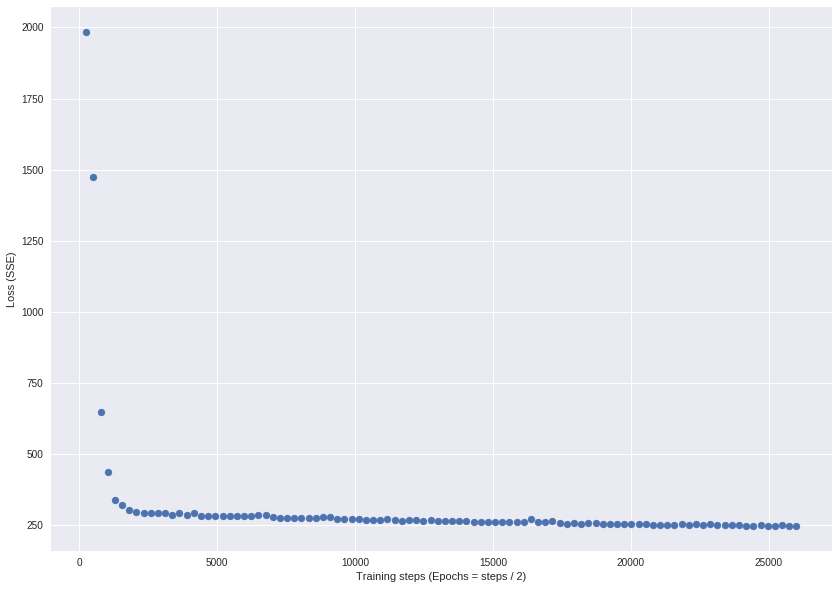

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [19]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_8l0dkg8/model.ckpt-26000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.95
The Mean Absolute Error: 1.16 degrees Celcius
The Median Absolute Error: 0.86 degrees Celcius
